import pandas เพื่อวิเคราะห์ข้อมูลสถิติ

In [2]:
import pandas as pd 
import pandas as pd1
import matplotlib.pyplot as plt

In [3]:
#copy path ของไฟล์data index.csv แล้วเอามาวาง
coff = pd.read_csv("/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/cleaned_data.csv")
df = pd1.read_csv("/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/index.csv")

ข้อมูลสรุปเชิงสถิติและการกระจายตัวของข้อมูล
1.ยอดขายในแต่ละเดือนที่ขายกาแฟได้
2.ในแต่ละเดือนกาแฟในแต่ละเดื่อน
3.ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ
3.ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
4.หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
5.จำนวนลูกค้าในแต่ละวัน

In [4]:
df.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB


shape data ที่ยังไม่ได้ทำความสะอาดจะมี 1464 คน (row ,column)
และ data มีค่า max สูงกว่าค่าอื่นจนผิดปกติ


In [6]:
df.describe()

,money
count,1464.000000
mean,32.081967
std,5.888605
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,128.900000


In [7]:
mode = df["money"].mode()
var = df['money'].var()
med = df['money'].median()
print(var,mode,med)

34.67566912811088 0    32.82
Name: money, dtype: float64 32.82


In [8]:
df.shape

(1464, 6)

ลองหาค่า max ของ money

In [9]:
result = df[df['money'] == df['money'].max()]
result

,date,datetime,cash_type,card,money,coffee_name
24,2024-03-03,2024-03-03 17:08:45.895,card,ANON-0000-0000-0019,128.9,Cortado


In [10]:
Q1 = df['money'].quantile(0.25)
Q3 = df['money'].quantile(0.75)
#หา Q1 Q3 ด้วย เปอร์เซ็นพาย
IQR = Q3 - Q1

print(Q1,Q3,IQR,df['money'].mean())
# Define outlier range
lower_bound = Q1 - 1.5 * IQR # ถ้าน้อยกว่าค่านี้จะเป็นค่าผิดปกติ
upper_bound = Q3 + 1.5 * IQR # ถ้ามากกว่าจะเป็นค่าผิดปกติ

print(lower_bound,upper_bound)
df = df[(df['money'] >= lower_bound) & (df['money'] <= upper_bound)] # ลบ data ที่ผิดปกติออกทั้งแถว!


27.92 37.72 9.799999999999997 32.08196721311475
13.220000000000006 52.419999999999995


จะเห็นได้ว่าเลข row ลดไป 1 แสดงว่ามีค่าผิดปกติ 1 ตัว

In [11]:
df.shape

(1463, 6)

In [12]:
df.describe()

,money
count,1463.000000
mean,32.015789
std,5.318216
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,40.000000


กูทำมั่วนะ


ยอดขายทั้งหมด

In [13]:
result = df['money'].sum()
result

np.float64(46839.1)

จำนวนลูกค้าในแต่ละเดือน ตั้งแต่เดือน มีนาคม ถึง กันยายน

แก้มบ้าไปแล้ว


In [14]:
ans = coff['date'].apply(lambda x : x[:-3])
ans.value_counts()

date
2024-08    272
2024-05    267
2024-07    237
2024-06    227
2024-03    205
2024-04    196
2024-09     59
Name: count, dtype: int64

ยอดขายในแต่ละเดือนที่ขายกาแฟได้ ตั้งแต่เดือน มีนาคม ถึง กันยายน

In [15]:
ans = [df['date'].apply(lambda x : x[:-3])]
value = df.groupby(ans)['money'].sum().sort_values()
value


date
2024-09    1745.28
2024-04    6720.56
2024-07    6915.94
2024-03    7021.30
2024-08    7613.84
2024-06    7758.76
2024-05    9063.42
Name: money, dtype: float64

กราฟยอดขายแต่ละเดือน ทำไงว้า แชทพิมควยไร

Text(0.5, 1.0, 'ยอดรวมราคาแต่ละเดือน')

/home/gamgamgam/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/gamgamgam/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/gamgamgam/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/gamgamgam/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/gamgamgam/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/gamgamgam/.local/lib/python3.10/site-packages/IPy

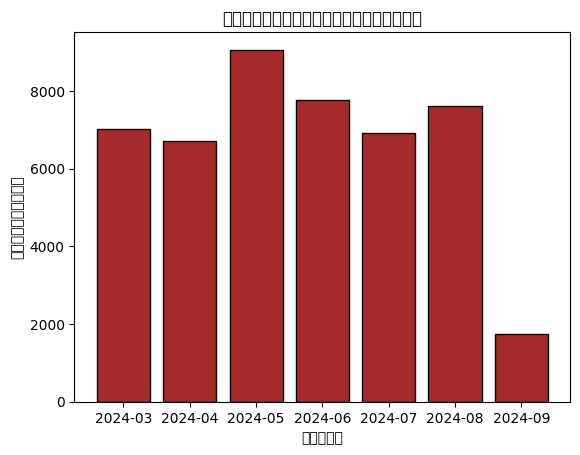

In [16]:
df['date'] = pd.to_datetime(df['date'])

# สร้างคอลัมน์เดือน
df['month'] = df['date'].dt.strftime('%Y-%m')

# คำนวณยอดรวมตามเดือน
monthly_total = df.groupby('month')['money'].sum().reset_index()

# สร้างกราฟแท่ง
plt.bar(monthly_total['month'], monthly_total['money'], color='brown', edgecolor='black')

# ตั้งชื่อแกนและกราฟ
plt.xlabel('เดือน')
plt.ylabel('ยอดรวมราคา')
plt.title('ยอดรวมราคาแต่ละเดือน')

ในแต่ละเดือนกาแฟอะไรขายดีที่สุด

In [17]:
ans = coff['date'].apply(lambda x : x[:-3])
value = coff.groupby([ans,'coffee_name'])['money'].sum()
value

date     coffee_name        
2024-03  Americano              1044.80
         Americano with Milk    1154.00
         Cappuccino              780.50
         Cocoa                   232.20
         Cortado                 840.30
         Espresso                241.00
         Hot Chocolate           854.00
         Latte                  1874.50
2024-04  Americano              1001.94
         Americano with Milk    1407.74
         Cappuccino             1659.44
         Cocoa                   232.82
         Cortado                 548.48
         Espresso                171.00
         Hot Chocolate           506.02
         Latte                  1193.12
2024-05  Americano              1348.80
         Americano with Milk    1908.28
         Cappuccino             2078.44
         Cocoa                   340.76
         Cortado                 474.64
         Espresso                185.14
         Hot Chocolate           529.36
         Latte                  2198.00
2024-06  Am

ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ

In [18]:
ans = coff['date'].apply(lambda x : x[:-3])
value = coff.groupby([ans])['cash_type'].value_counts()
value

date     cash_type
2024-03  card         174
         cash          31
2024-04  card         168
         cash          28
2024-05  card         241
         cash          26
2024-06  card         223
         cash           4
2024-07  card         237
2024-08  card         272
2024-09  card          59
Name: count, dtype: int64

ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน

In [19]:
month = coff['date'].apply(lambda x : x[:-3])
time = coff['datetime'].apply(lambda x : x.split(' ')[1][:2])
value = coff.groupby([time])['money'].sum().reset_index()
value.max()

datetime        22
money       5235.0
dtype: object

หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน

In [20]:
month = coff['date'].apply(lambda x : x[:-3])
value = coff.groupby([month,'coffee_name'])['money'].sum().reset_index()

best_selling_per_month = value.loc[value.groupby(value['date'].str[:7])['money'].idxmax()]
best_selling_per_month

,date,coffee_name,money
7,2024-03,Latte,1874.50
10,2024-04,Cappuccino,1659.44
23,2024-05,Latte,2198.00
25,2024-06,Americano with Milk,2268.12
33,2024-07,Americano with Milk,1863.80
41,2024-08,Americano with Milk,2010.24
49,2024-09,Americano with Milk,586.32


In [21]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'month'],
      dtype='object')